# Combining Representations from Different Groups (experimental)

In [10]:
from emlp.solver.groups import *
from emlp.solver.representation import T,vis,V

In [5]:
rep = 2*T(1)(Z(3))*T(1)(S(4))+T(2)(SO(3))

In [6]:
(rep>>rep)

V⁴+4V_Z(3)⊗V²_SO(3)⊗V_S(4)+4V²_Z(3)⊗V²_S(4)

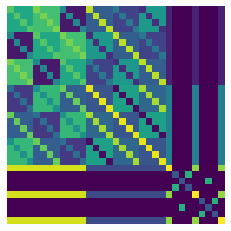

In [7]:
vis(rep,rep)

In [5]:
#repin,repout = T(2)(SO(3))*T(1)(S(4)),T(1)(SO(3))*T(2)(S(4))
repin,repout = T(1)(SO(3))*T(2)(S(4)),T(2)(SO(3))*T(1)(S(4))

In [6]:
(repin>>repout)

V³_S(4)⊗V³_SO(3)

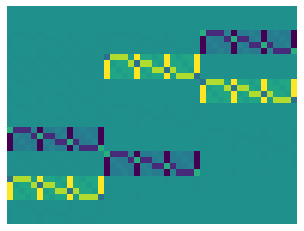

In [7]:
vis(repin,repout,cluster=False)

In [8]:
import numpy as np

In [9]:
from emlp.solver.representation import Rep,V,T,vis
import jax.numpy as jnp

In [10]:
class PseudoScalar(Rep):
    is_regular=False
    def __init__(self,G=None):
        self.G=G
    def __call__(self,G):
        return PseudoScalar(G)
    def size(self):
        return 1
    def __str__(self):
        return "P"
    def rho(self,M):
        sign = jnp.linalg.slogdet(M@jnp.eye(M.shape[0]))[0]
        return sign*jnp.eye(1)
    def __eq__(self,other):
        return type(self)==type(other) and self.G==other.G
    def __hash__(self):
        return hash((type(self),self.G))
    @property
    def T(self):
        return self

In [171]:
#F = Fermi(5)
P = PseudoScalar(S(3))
W = V(S(3))

In [172]:
Q = (P*W**3).symmetric_basis()

In [173]:
Q.shape

(27, 4)

In [174]:
Q#.reshape(2,2)

DeviceArray([[ 1.21046034e-10, -3.31456529e-09,  2.29685071e-08,
               7.32013339e-09],
             [-6.31171861e-05,  5.55924475e-02, -3.85348558e-01,
              -1.22811407e-01],
             [ 6.31154981e-05, -5.55924810e-02,  3.85348618e-01,
               1.22811541e-01],
             [-4.31170277e-02,  1.87860817e-01, -8.43887404e-02,
               3.49849045e-01],
             [ 3.43581527e-01,  2.07377002e-01,  4.81535234e-02,
              -5.73966093e-02],
             [-2.16239005e-01,  2.92026043e-01,  9.34502408e-02,
              -1.60920069e-01],
             [ 4.31172363e-02, -1.87860966e-01,  8.43888894e-02,
              -3.49849403e-01],
             [ 2.16238961e-01, -2.92026103e-01, -9.34502333e-02,
               1.60920024e-01],
             [-3.43581647e-01, -2.07377106e-01, -4.81534861e-02,
               5.73966280e-02],
             [-3.43581408e-01, -2.07376927e-01, -4.81534228e-02,
               5.73965237e-02],
             [ 4.31171283e-02,

In [68]:
Q = np.array(Q)
Q[np.abs(Q)<1e-4]=0
Q[np.abs(Q)>1e-4] /= np.abs(Q)[np.abs(Q)>1e-4]
(np.abs(Q)>0).sum()

720

In [163]:
G=S(2)
Qp = (P*W).rho(G.sample())@Q

In [167]:
G.sample()

DeviceArray([[0., 1.],
             [1., 0.]], dtype=float32)

In [164]:
Qp

DeviceArray([[ 0.70710677],
             [-0.70710677]], dtype=float32)

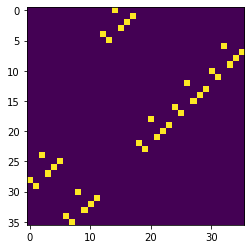

In [97]:
g = G.sample()
plt.imshow((W**2).rho(g).to_dense())

In [100]:
((W**4).rho(g).to_dense()>0).sum()

DeviceArray(1296, dtype=int32)

In [84]:
jnp.abs(Qp+Q).mean()

DeviceArray(0., dtype=float32)

In [39]:
(W**2>>W**2).symmetric_basis().shape

(1296, 15)

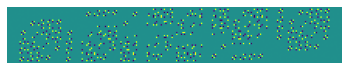

In [34]:
vis(P*W**3,W**2,False)

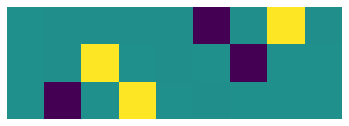

In [158]:
vis(V(SO(3))**2,V(SO(3)),cluster=False)

In [159]:
P^P

TypeError: unsupported operand type(s) for ^: 'PseudoScalar' and 'PseudoScalar'

In [129]:
G = S(5)
P.rho_dense(G.sample())

DeviceArray([[1.]], dtype=float32)

In [98]:
p = np.array([2,0,1,3])

In [99]:
g = np.eye(4)[:,p]
g

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [101]:
g.T@np.arange(4)

array([2., 0., 1., 3.])

In [105]:
g = G.sample()
print(g)
np.eye(5)[(g@np.arange(5)).astype(int),:]

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [81]:
Q = (F**2>>W**2).symmetric_basis()

In [82]:
Q.shape

(625, 15)

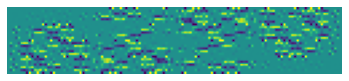

In [170]:
vis(P*W**3,W**2,cluster=False)

In [168]:
W.size()

5

In [ ]:
# def parity(perm):
#     n = len(perm)
#     arange = np.arange(n)
#     tri_ids = np.tril_indices(n,k=-1)
#     vandermonde = np.prod((perm[:,None]-perm[None,:])[tri_ids])
#     vandermonde_orig = np.prod((arange[:,None]-arange[None,:])[tri_ids])
#     return vandermonde//vandermonde_orig

# class Fermi(Rep):
#     is_regular=False
#     def __init__(self,n):
#         self.G= S(n) # n dimensional permutation group
#     def rho(self,M):
#         perm = (M@np.arange(M.shape[-1])).astype(int)
#         sigma = parity(perm)
#         return sigma*M
#     def size(self):
#         return self.G.d
#     def __eq__(self,other):
#         return type(self)==type(other) and self.G==other.G
#     def __hash__(self):
#         return hash((type(self),self.G))
#     def __str__(self):
#         return "F"
#     @property
#     def T(self):
#         return self